<a href="https://colab.research.google.com/github/therudradev/Python_Programming/blob/main/session9_oop_part3_Inheritance_Polymorphism_Abstraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Class Relationships

- Aggregation
- Inheritance

### Aggregation(Has-A relationship)
* one class own the another class.
* Customer has a address (Customer own the Address class.)

In [ ]:
# example of aggregation (Has-A relationship)
class Customer:

  def __init__(self,name,gender,address):
    self.name = name
    self.gender = gender
    self.address = address

  def print_address(self):
    # print(self.address.__city,self.address.pin,self.address.state) # get error (you can't access the private variable of own class).
    # print(self.address._Address__city,self.address.pin,self.address.state)
    print(self.address.get_city(),self.address.pin,self.address.state)

  def edit_profile(self,new_name,new_city,new_pin,new_state):
    self.name = new_name
    self.address.edit_address(new_city,new_pin,new_state)

class Address:

  def __init__(self,city,pin,state):
      self.__city = city
      self.pin = pin
      self.state = state

  def get_city(self):
    return self.__city

  def edit_address(self,new_city,new_pin,new_state):
    self.__city = new_city
    self.pin = new_pin
    self.state = new_state

add1 = Address('gurgaon',122011,'haryana')
cust = Customer('nitish','male',add1)

cust.print_address()

cust.edit_profile('ankit','mumbai',111111,'maharastra')
cust.print_address()
# method example
# what about private attribute

gurgaon 122011 haryana
mumbai 111111 maharastra


##### Aggregation class diagram
* `-` Show the private
* `+` Show the public
* Diamond and Rombus show the Aggregation in class Diagram.
* `🔷` Diamond sign show the who own the class. (In below diagram customer own the address calss.)

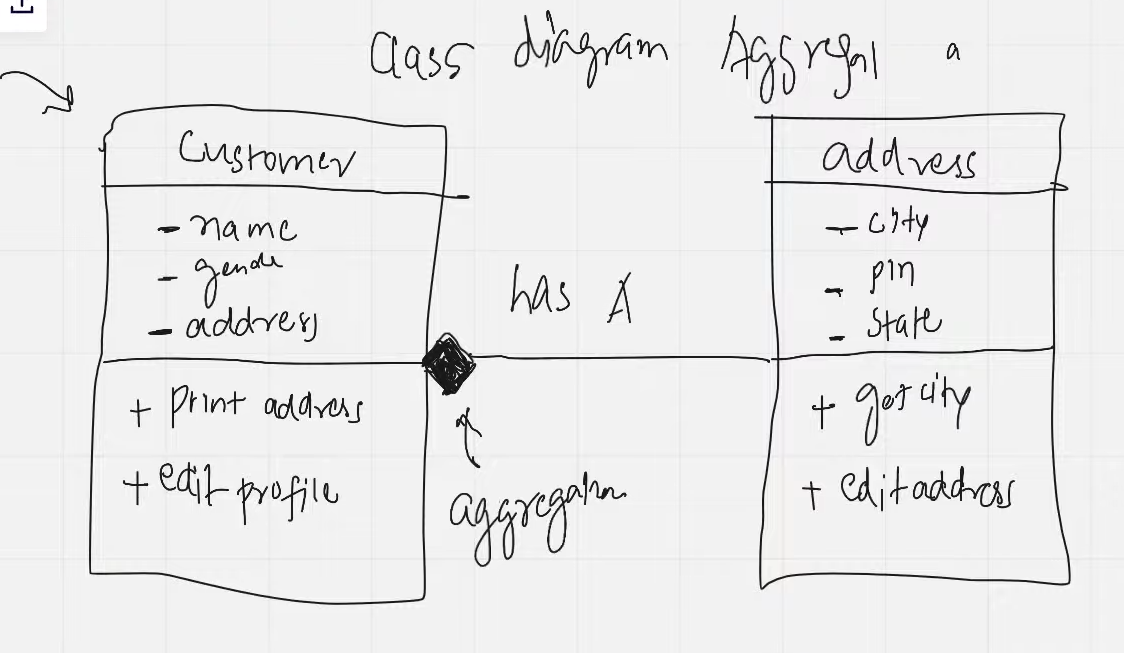

### Inheritance

- What is inheritance
- Example
- What gets inherited?

In [ ]:
# Inheritance and it's benefits

In [ ]:
# Example

# parent
class User:

  def __init__(self):
    self.name = 'nitish'
    self.gender = 'male'

  def login(self):
    print('login')

# child
class Student(User):

  def __init__(self):
    self.rollno = 100

  def enroll(self):
    print('enroll into the course')

u = User()
s = Student()

print(s.name)
s.login()
s.enroll()

nitish
login
enroll into the course


# Class diagram
* `◀️` Triangle show the Inheritance in class diagram
* Head of the arrow is in parent class.

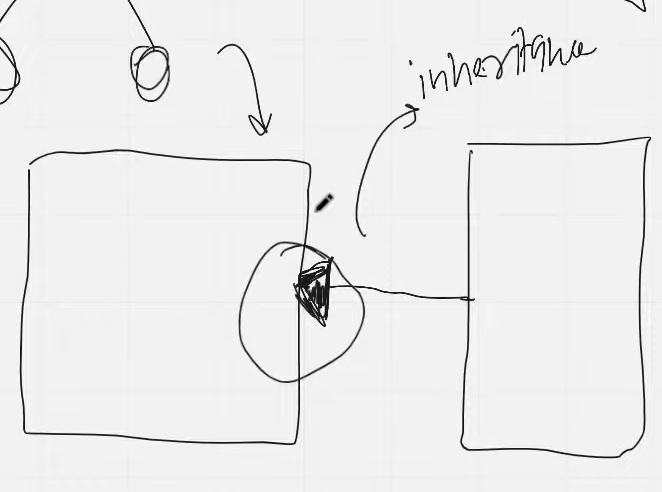

##### What gets inherited?

- Constructor
- Non Private Attributes
- Non Private Methods

In [ ]:
# constructor example

class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    pass

s=SmartPhone(20000, "Apple", 13)
s.buy()

Inside phone constructor
Buying a phone


# if child has its own construtor then the parent construtor does not called.

In [ ]:
# constructor example 2
# **if child has its own construtor then the parent construtor does not called.**

class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

class SmartPhone(Phone):
    def __init__(self, os, ram):
        self.os = os
        self.ram = ram
        print ("Inside SmartPhone constructor")

s=SmartPhone("Android", 2)
s.brand

Inside SmartPhone constructor


AttributeError: ignored

In [ ]:
# child can't access private members of the class

class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    #getter
    def show(self):
        print (self.__price)

class SmartPhone(Phone):
    def check(self):
        print(self.__price)

s=SmartPhone(20000, "Apple", 13)
s.show()
s.__price()

Inside phone constructor
20000


AttributeError: 'SmartPhone' object has no attribute '__price'

In [ ]:
# private data can access by getter
class Parent:

    def __init__(self,num):
        self.__num=num

    #getter
    def get_num(self):
        return self.__num

class Child(Parent):

    def show(self):
        print("This is in child class")

son=Child(100)
print(son.get_num())
son.show()

100
This is in child class


In [ ]:
class Parent:

    def __init__(self,num):
        self.__num=num

    def get_num(self):
        return self.__num

class Child(Parent):

    def __init__(self,val,num):
        self.__val=val

    def get_val(self):
        return self.__val

son=Child(100,10)
print("Parent: Num:",son.get_num())
print("Child: Val:",son.get_val())

AttributeError: ignored

In [ ]:
class A:
    def __init__(self):
        self.var1=100

    def display1(self,var1):
        print("class A :", self.var1)
class B(A):

    def display2(self,var1):
        print("class B :", self.var1)

obj=B()
print('Display 1:',obj.display1(200))
print('Display 2:',obj.display2(200))

#None is retrun value

class A : 100
Display 1: None
class B : 100
Display 2: None


# 🔹 What is Method Overriding?

👉 **Definition:**
Method overriding happens when a **child (subclass) provides a new implementation of a method** that is already defined in the **parent (superclass)**.

* Same **method name**
* Same **parameters**
* Different **behavior**

---

# 🔹 Why do we need Method Overriding?

1. To **customize or change behavior** of inherited methods.
2. To achieve **runtime polymorphism** (deciding which method runs at execution time).
3. To reuse parent functionality but extend or modify it.

---

# 🔹 Example: Method Overriding in Python

```python
class Animal:
    def sound(self):
        print("Animals make sounds")

class Dog(Animal):   # Dog inherits from Animal
    def sound(self):  # overriding method
        print("Dog barks")

class Cat(Animal):
    def sound(self):  # overriding method
        print("Cat meows")

# Objects
a = Animal()
d = Dog()
c = Cat()

a.sound()   # Animals make sounds
d.sound()   # Dog barks
c.sound()   # Cat meows
```

👉 Here, `sound()` is defined in `Animal`, but both `Dog` and `Cat` **override** it with their own implementation.

---

# 🔹 Using `super()` in Overriding

Sometimes, we want to keep **parent functionality** and **add extra behavior**.
We use `super()` for this.

```python
class Person:
    def show(self):
        print("I am a Person")

class Student(Person):
    def show(self):
        super().show()   # call parent method
        print("I am also a Student")

s = Student()
s.show()
```

### ✅ Output:

```
I am a Person
I am also a Student
```

---

# 🔹 Method Overriding vs Method Overloading

* **Overriding** → Same method name, same parameters, in **different classes (parent-child)**.
* **Overloading** → Same method name but **different parameters**, in the **same class**.
  (Python doesn’t support true overloading, but we can simulate it using default arguments or `*args`).

---

# ✅ Real-Life Analogy

* **Parent Class (Animal)** → “I can make a sound.”
* **Child Classes (Dog, Cat, Cow)** → Override that sound: *bark, meow, moo*.
* Same method name (`sound`), different implementations.

---

⚡ In short:
**Method overriding = Redefining parent’s method in child class.**

---



In [ ]:
# Method Overriding
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    def buy(self):
        print ("Buying a smartphone")

s=SmartPhone(20000, "Apple", 13)

s.buy()

Inside phone constructor
Buying a smartphone


### Super Keyword

In [ ]:
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    def buy(self):
        print ("Buying a smartphone")
        # syntax to call parent ka buy method
        super().buy()

s=SmartPhone(20000, "Apple", 13)

s.buy()

Inside phone constructor
Buying a smartphone
Buying a phone


In [ ]:
# using super outside the class
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    def buy(self):
        print ("Buying a smartphone")
        # syntax to call parent ka buy method
        super().buy()

s=SmartPhone(20000, "Apple", 13)

s.buy()

Inside phone constructor


RuntimeError: ignored

In [ ]:
# can super access parent ka data?
# using super outside the class
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    def buy(self):
        print ("Buying a smartphone")
        # syntax to call parent ka buy method
        print(super().brand)

s=SmartPhone(20000, "Apple", 13)

s.buy()

Inside phone constructor
Buying a smartphone


AttributeError: ignored

In [ ]:
# super -> constuctor
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

class SmartPhone(Phone):
    def __init__(self, price, brand, camera, os, ram):
        print('Inside smartphone constructor')
        super().__init__(price, brand, camera)
        self.os = os
        self.ram = ram
        print ("Inside smartphone constructor")

s=SmartPhone(20000, "Samsung", 12, "Android", 2)

print(s.os)
print(s.brand)

Inside smartphone constructor
Inside phone constructor
Inside smartphone constructor
Android
Samsung


##### Inheritance in summary

- A class can inherit from another class.

- Inheritance improves code reuse

- Constructor, attributes, methods get inherited to the child class

- The parent has no access to the child class

- Private properties of parent are not accessible directly in child class

- Child class can override the attributes or methods. This is called method overriding

- super() is an inbuilt function which is used to invoke the parent class methods and constructor

In [ ]:
class Parent:

    def __init__(self,num):
      self.__num=num

    def get_num(self):
      return self.__num

class Child(Parent):

    def __init__(self,num,val):
      super().__init__(num)
      self.__val=val

    def get_val(self):
      return self.__val

son=Child(100,200)
print(son.get_num())
print(son.get_val())

100
200


In [ ]:
class Parent:
    def __init__(self):
        self.num=100

class Child(Parent):

    def __init__(self):
        super().__init__()
        self.var=200

    def show(self):
        print(self.num)
        print(self.var)

son=Child()
son.show()

100
200


In [ ]:
class Parent:
    def __init__(self):
        self.__num=100

    def show(self):
        print("Parent:",self.__num)

class Child(Parent):
    def __init__(self):
        super().__init__()
        self.__var=10

    def show(self):
        print("Child:",self.__var)

obj=Child()
obj.show()

Child: 10


In [ ]:
class Parent:
    def __init__(self):
        self.__num=100

    def show(self):
        print("Parent:",self.__num)

class Child(Parent):
    def __init__(self):
        super().__init__()
        self.__var=10

    def show(self):
        print("Child:",self.__var)

obj=Child()
obj.show()

Child: 10


### Types of Inheritance

- Single Inheritance
- Multilevel Inheritance
- Hierarchical Inheritance
- Multiple Inheritance(Diamond Problem)
- Hybrid Inheritance

In [ ]:
# single inheritance
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    pass

SmartPhone(1000,"Apple","13px").buy()

Inside phone constructor
Buying a phone


In [ ]:
# multilevel
class Product:
    def review(self):
        print ("Product customer review")

class Phone(Product):
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    pass

s=SmartPhone(20000, "Apple", 12)

s.buy()
s.review()

Inside phone constructor
Buying a phone
Product customer review


In [ ]:
# Hierarchical
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    pass

class FeaturePhone(Phone):
    pass

SmartPhone(1000,"Apple","13px").buy()
FeaturePhone(10,"Lava","1px").buy()

Inside phone constructor
Buying a phone
Inside phone constructor
Buying a phone


In [ ]:
# Multiple
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class Product:
    def review(self):
        print ("Customer review")

class SmartPhone(Phone, Product):
    pass

s=SmartPhone(20000, "Apple", 12)

s.buy()
s.review()


Inside phone constructor
Buying a phone
Customer review


In [ ]:
# the diamond problem
# https://stackoverflow.com/questions/56361048/what-is-the-diamond-problem-in-python-and-why-its-not-appear-in-python2
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class Product:
    def buy(self):
        print ("Product buy method")

# Method resolution order
class SmartPhone(Phone,Product):
    pass

s=SmartPhone(20000, "Apple", 12)

s.buy()

Inside phone constructor
Buying a phone


In [ ]:
class A:

    def m1(self):
        return 20

class B(A):

    def m1(self):
        return 30

    def m2(self):
        return 40

class C(B):

    def m2(self):
        return 20
obj1=A()
obj2=B()
obj3=C()
print(obj1.m1() + obj3.m1()+ obj3.m2())

70


In [ ]:
class A:

    def m1(self):
        return 20

class B(A):

    def m1(self):
        val=super().m1()+30
        return val

class C(B):

    def m1(self):
        val=self.m1()+20
        return val
obj=C()
print(obj.m1())

RecursionError: ignored

### Polymorphism

- Method Overriding
- Method Overloading
- Operator Overloading

# 🔹 1. Polymorphism (Many Forms)

👉 **Definition:**
Polymorphism means **the same function/operator/method name can behave differently depending on the object or data type.**

* From Greek: *poly* = many, *morph* = forms.
* In Python, polymorphism is achieved through:

  * **Method Overriding**
  * **Method Overloading (limited in Python)**
  * **Operator Overloading**

---

# 🔹 2. Method Overriding (Runtime Polymorphism)

👉 When a **child class redefines** a method already present in the **parent class**.

✅ Example:

```python
class Animal:
    def sound(self):
        print("Animals make sound")

class Dog(Animal):
    def sound(self):   # overriding
        print("Dog barks")

class Cat(Animal):
    def sound(self):   # overriding
        print("Cat meows")

# Runtime polymorphism
for animal in (Dog(), Cat(), Animal()):
    animal.sound()
```

✅ Output:

```
Dog barks
Cat meows
Animals make sound
```

👉 Same method name `sound()`, different behavior based on object → **Polymorphism**.

---

# 🔹 3. Method Overloading (Compile-time Polymorphism ❌ not true in Python)

👉 In many languages (like Java/C++), method overloading means: **same method name, different parameters**.

⚠️ But Python does **not support true method overloading** because functions are replaced by the latest definition. (latest definition execute hoga)

✅ We simulate it using **default arguments** or `*args`.

Example:

```python
class Math:
    def add(self, a, b=0, c=0):
        return a + b + c

m = Math()
print(m.add(5))        # 5
print(m.add(5, 10))    # 15
print(m.add(5, 10, 20))# 35
```

👉 Same method `add()` behaves differently depending on arguments.

---

# 🔹 4. Operator Overloading

👉 In Python, **operators are just methods** internally.
We can redefine their behavior using **magic methods (dunder methods)**.

✅ Example: Overloading `+` operator

```python
class Book:
    def __init__(self, pages):
        self.pages = pages

    def __add__(self, other):  # overloading + operator
        return self.pages + other.pages

b1 = Book(100)
b2 = Book(200)

print(b1 + b2)  # 300
```

✅ Output:

```
300
```

👉 Here, `b1 + b2` calls `b1.__add__(b2)`.

---

# 🔹 Quick Comparison Table

| Type                     | Meaning                            | Example in Python                    |
| ------------------------ | ---------------------------------- | ------------------------------------ |
| **Polymorphism**         | Same thing in many forms           | `len("abc")` → 3, `len([1,2,3])` → 3 |
| **Method Overriding**    | Child redefines parent’s method    | `Dog.sound()` vs `Cat.sound()`       |
| **Method Overloading**   | Same method name, different params | Simulated with `*args`               |
| **Operator Overloading** | Redefining operators for objects   | `__add__`, `__sub__`, etc.           |

---


In [ ]:
class Shape:

  def area(self,a,b=0):
    if b == 0:
      return 3.14*a*a
    else:
      return a*b

s = Shape()

print(s.area(2))
print(s.area(3,4))

12.56
12


In [ ]:
'hello' + 'world'

'helloworld'

In [ ]:
4 + 5

9

In [ ]:
[1,2,3] + [4,5]

[1, 2, 3, 4, 5]

# Abstraction

# 🔹 What is Abstraction?

👉 **Definition:**
Abstraction is the process of **hiding implementation details** and showing only the **essential features** to the user.

* The user **knows what a function does**, but not **how it does it**.
* It focuses on **“what to do”** rather than **“how to do it”**.

---

# 🔹 Why do we need Abstraction?

1. **Simplifies code** → user doesn’t see complexity.
2. **Security** → hides sensitive details.
3. **Flexibility** → implementation can change without affecting the user.
4. **Standardization** → provides a common interface.

---

# 🔹 Abstraction in Python

In Python, we achieve abstraction using:

* **Abstract Classes** → A class that cannot be instantiated.
* **Abstract Methods** → Methods defined in the abstract class but not implemented.
* We use the **`abc` module (Abstract Base Class)** for this.

---

## ✅ Example 1: Abstraction with Abstract Class

```python
from abc import ABC, abstractmethod

# Abstract Class
class Shape(ABC):
    @abstractmethod
    def area(self):
        pass  # only definition, no implementation

    @abstractmethod
    def perimeter(self):
        pass

# Concrete Class
class Circle(Shape):
    def __init__(self, r):
        self.r = r

    def area(self):
        return 3.14 * self.r * self.r

    def perimeter(self):
        return 2 * 3.14 * self.r

# Another Concrete Class
class Rectangle(Shape):
    def __init__(self, l, w):
        self.l = l
        self.w = w

    def area(self):
        return self.l * self.w

    def perimeter(self):
        return 2 * (self.l + self.w)

# User only interacts with interface
shapes = [Circle(5), Rectangle(4, 6)]
for s in shapes:
    print("Area:", s.area(), "Perimeter:", s.perimeter())
```

👉 User just calls `area()` and `perimeter()` → doesn’t care about formulas.

---

## ✅ Example 2: Real-Life Analogy (Abstraction)

Think about an **ATM machine** 💳:

* You just press "Withdraw ₹500".
* You don’t know (or care) about:

  * Bank server communication
  * Cash dispensing mechanism
  * Ledger updates
* All those details are **hidden** → only essential actions are shown.

---

# 🔹 Difference Between Abstraction & Encapsulation

| **Feature**     | **Abstraction**                                           | **Encapsulation**                       |
| --------------- | --------------------------------------------------------- | --------------------------------------- |
| **Definition**  | Hiding *implementation details*, showing only essentials. | Hiding *data* and controlling access.   |
| **Focus**       | **What to do**                                            | **How to protect data**                 |
| **Achieved By** | Abstract classes, abstract methods                        | Private variables, getters, setters     |
| **Example**     | `area()` method in Shape (only declared)                  | `__marks` variable with getters/setters |

👉 Shortcut:

* **Abstraction = Hiding Implementation (simplicity)**
* **Encapsulation = Hiding Data (security)**

---

# ✅ Summary

* **Abstraction** hides the **implementation** and shows only **functionality**.
* Achieved using **abstract classes** and **abstract methods** in Python (`abc` module).
* Helps in **simplicity, flexibility, and security**.

In [ ]:
from abc import ABC,abstractmethod
class BankApp(ABC):

  def database(self):
    print('connected to database')

  @abstractmethod
  def security(self):
    pass

  @abstractmethod
  def display(self):
    pass


In [ ]:
class MobileApp(BankApp):

  def mobile_login(self):
    print('login into mobile')

  def security(self):
    print('mobile security')

  def display(self):
    print('display')

In [ ]:
mob = MobileApp()

In [ ]:
mob.security()

mobile security


In [ ]:
# you can't make object of abstract class
obj = BankApp()

TypeError: ignored